### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Load Dataset

In [2]:
data = pd.read_csv('E://UsedCarsPrice.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
data.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

### Replace or Remove Null

In [6]:
# Replace the null of data['EngineV'] with the 'mean'.
data['EngineV'] = data['EngineV'].fillna(data['EngineV'].mean())

In [7]:
# Remove the other null
data.dropna(axis= 0, inplace= True)

In [8]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Dealing with Data

### Remove or Replace outliers

<AxesSubplot:xlabel='Price', ylabel='Density'>

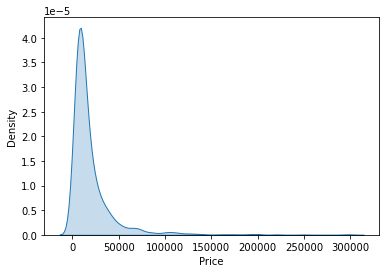

In [9]:
# First of all finding the outliers of the target whcich here is 'Price'
sns.kdeplot(data['Price'], shade= True)

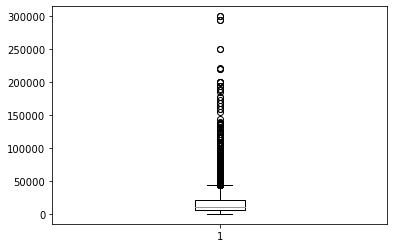

In [10]:
# The other way to find the outliers
plt.boxplot(data['Price'])
plt.show()

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

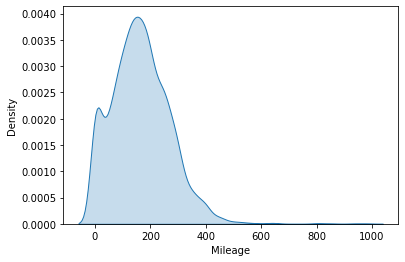

In [11]:
# Finding the columns outlier
sns.kdeplot(data['Mileage'], shade= True)

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

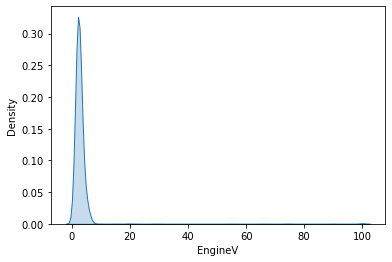

In [12]:
sns.kdeplot(data['EngineV'], shade= True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

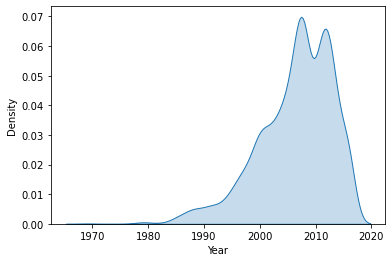

In [13]:
sns.kdeplot(data['Year'], shade= True)

In [15]:
# Removing the outliers
cols = ['Price', 'Mileage', 'EngineV', 'Year'] 

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='Price', ylabel='Density'>

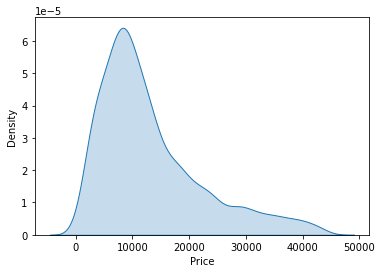

In [16]:
# Review the figure
sns.kdeplot(data['Price'], shade= True)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

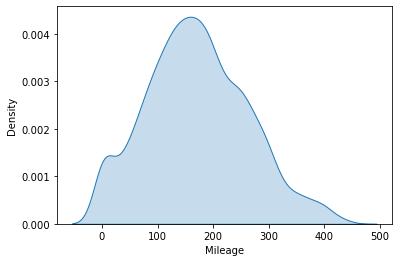

In [18]:
sns.kdeplot(data['Mileage'], shade= True)

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

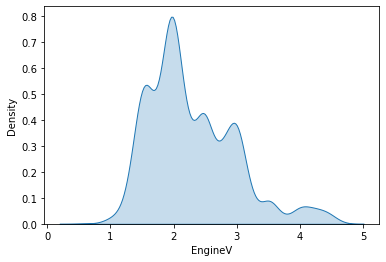

In [19]:
sns.kdeplot(data['EngineV'], shade= True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

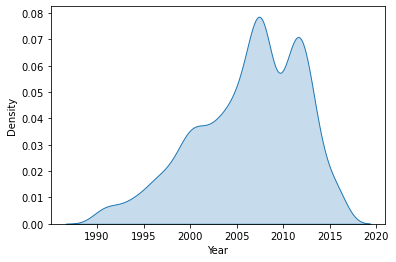

In [20]:
sns.kdeplot(data['Year'], shade= True)

### Finding correlation between features

In [21]:
# Splitting numerical variables
numerical_variables = data.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis= 1)
numerical_variables

,Price,Mileage,EngineV,Year
0,4200.0,277,2.000000,1991
1,7900.0,427,2.900000,1999
3,23000.0,240,4.200000,2007
4,18300.0,120,2.000000,2011
6,6100.0,438,2.000000,1997
...,...,...,...,...
4338,11500.0,163,2.500000,2008
4339,17900.0,35,1.600000,2014
4341,6500.0,1,3.500000,1999
4343,14200.0,31,2.790734,2014


In [22]:
# Correlation between numerical variables
corr = numerical_variables.corr()
corr

,Price,Mileage,EngineV,Year
Price,1.000000,-0.525171,0.304868,0.625515
Mileage,-0.525171,1.000000,0.151040,-0.694520
EngineV,0.304868,0.151040,1.000000,-0.162799
Year,0.625515,-0.694520,-0.162799,1.000000


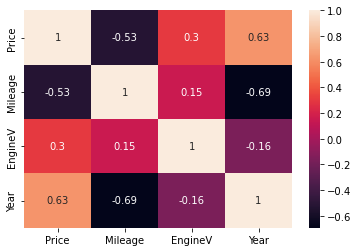

In [23]:
# Correlation between numerical variables by using heatmap
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, annot= True)
plt.show()

In [24]:
# Splitting categorical variables
categorical_variables = data.drop(['Mileage', 'EngineV', 'Year', 'Price'], axis= 1)
categorical_variables

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
3,Audi,crossover,Petrol,yes,Q7
4,Toyota,crossover,Petrol,yes,Rav 4
6,BMW,sedan,Gas,yes,320
...,...,...,...,...,...
4338,Volkswagen,van,Diesel,yes,T5 (Transporter)
4339,Toyota,sedan,Petrol,yes,Corolla
4341,BMW,sedan,Petrol,yes,535
4343,Toyota,sedan,Petrol,yes,Corolla


In [25]:
# Correlation between two categorical variables
from scipy.stats import spearmanr
spearmanr_coeff,_ = spearmanr(categorical_variables.Model, categorical_variables.Brand)
spearmanr_coeff

0.4076711069058784

In [26]:
coeff_Model_Body,_ = spearmanr(categorical_variables.Model, categorical_variables.Body)
coeff_Model_Body

-0.05246733369677072

#### Historgarm of some columns

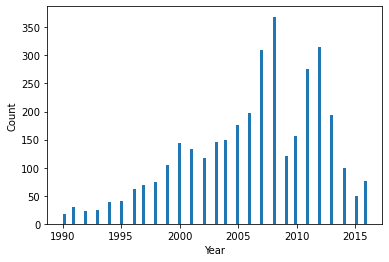

In [27]:
plt.hist(data['Year'], bins= 100)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

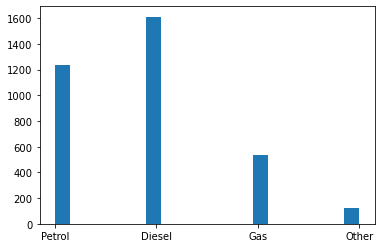

In [29]:
plt.hist(data['Engine Type'], bins= 20)
plt.show()

#### Relationship between features

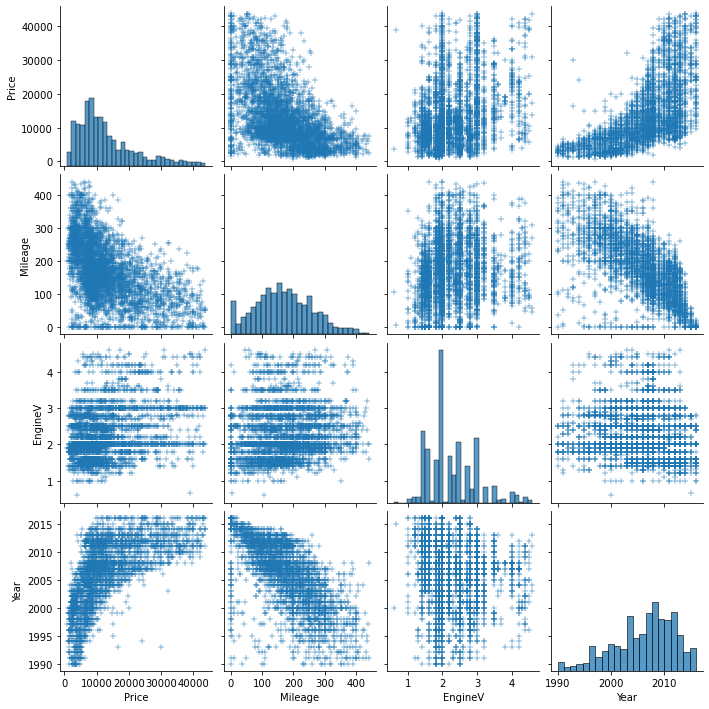

In [28]:
sns.pairplot(data, markers= '+')
plt.show()

In [30]:
# Rename column
data.rename(columns= {'Engine Type': 'Engine_Type'}, inplace= True)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320


In [31]:
data['Model'].value_counts

<bound method IndexOpsMixin.value_counts of 0                     320
1            Sprinter 212
3                      Q7
4                   Rav 4
6                     320
              ...        
4338     T5 (Transporter)
4339              Corolla
4341                  535
4343              Corolla
4344    T5 (Transporter) 
Name: Model, Length: 3509, dtype: object>

In [32]:
# Drop a column
data.drop(['Model'],axis= 1, inplace= True)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine_Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997


### Feature Engineering

In [34]:
# Log the 'Price'
data['Price'] = np.log(data['Price'])

In [35]:
# Dummy variables
data = pd.get_dummies(data)
data.head()

,Price,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes
0,2.121404,277,2.0,1991,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2.194400,427,2.9,1999,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,2.306901,240,4.2,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2.283877,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,2.165165,438,2.0,1997,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [36]:
# Split features and the target
X = data.drop(['Price'], axis= 1)
Y = data['Price']
X

,Mileage,EngineV,Year,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine_Type_Diesel,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_no,Registration_yes
0,277,2.000000,1991,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.900000,1999,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,240,4.200000,2007,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.000000,2011,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
6,438,2.000000,1997,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.500000,2008,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
4339,35,1.600000,2014,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4341,1,3.500000,1999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4343,31,2.790734,2014,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


### Creating Model

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

#### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

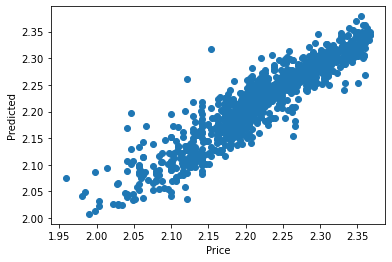

In [40]:
plt.scatter(y_test, y_predict)
plt.xlabel('Price')
plt.ylabel('Predicted')
plt.show()

In [41]:
# Accuracy
acc = reg.score(x_test, y_test)
print(acc)

0.8601334932121388


In [42]:
# Mean Squared Error
import sklearn.metrics
mse = metrics.mean_squared_error(y_test, y_predict)
mse

0.000871235680155905

#### SVM

In [47]:
from sklearn.svm import SVR
svr = SVR(kernel= 'rbf')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [48]:
# Accuracy
print(svr.score(x_test, y_test))

0.585270847386041


In [45]:
mse_svr = metrics.mean_squared_error(y_test, y_pred)
mse_svr

0.0025833692687137573

#### Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
prediction = gb.predict(x_test)

In [50]:
mae = metrics.mean_absolute_error(y_test, prediction)
mae

0.019298586222990403

In [51]:
# Accuracy
print(gb.score(x_test, y_test))

0.8815581414751292
